# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize
import math

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

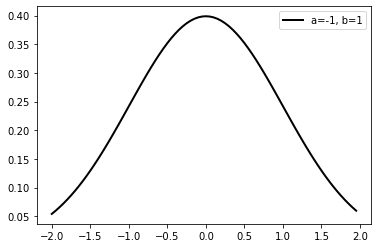

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
#ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
#ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [14]:
mu = 1/len(data) * sum(data)
sigma = math.sqrt(1/len(data) * sum((data-mu)**2))
print(mu, sigma)

3.7950426877470336 2.103628356344459


# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [13]:
mu, sigma = stats.norm.fit(data)
print(mu, sigma)

3.795042687747036 2.1036283563444593


# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [5]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [35]:
def mle(x):
    mu, sigma = x
    return -np.sum(np.log(Gpdf(data,mu, np.abs(sigma))))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [36]:
print(mle((0,1)))
print(mle((0,2)))
print(mle((1,1)))
print(mle((0.5,0.2)))

5228.366017451564
2006.5611510773965
3561.074417451564
inf


/tmp/ipykernel_290312/3655122714.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(Gpdf(data,mu, np.abs(sigma))))


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [37]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [59]:
x0 = np.asarray((1, 1))  # Initial guess.
res1 = optimize.fmin_cg(mle, x0)
print(res1)

         Current function value: 1094.276701
         Iterations: 12
         Function evaluations: 180
         Gradient evaluations: 55
[3.79504269 2.10362832]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [41]:
def pdf(x, mu, sigma, tau):
    c = np.sqrt(2 / np.pi) * (1 / sigma) * (1 / (1 + tau))
    scale = np.where(x <= mu, sigma, sigma * tau)
    return c * np.exp(- (x - mu) ** 2 / (2.0 * scale ** 2))

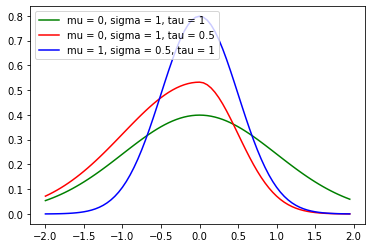

In [57]:
t = np.arange(-2, 2, 0.05)

fig, ax = plt.subplots(1, 1)

mu, sigma, tau = 0, 1, 1
ax.plot(t, pdf(t, mu, sigma, tau), 'g-', label='mu = 0, sigma = 1, tau = 1')

 
mu, sigma, tau = 0, 1, 0.5
ax.plot(t, pdf(t, mu, sigma, tau), 'r-', label='mu = 0, sigma = 1, tau = 0.5')

mu, sigma, tau = 0, 0.5, 1
ax.plot(t, pdf(t, mu, sigma, tau), 'b-', label='mu = 1, sigma = 0.5, tau = 1')

ax.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

         Current function value: 984.728630
         Iterations: 82
         Function evaluations: 880
         Gradient evaluations: 217
[ 1.44347907  0.15735162 20.53296859]


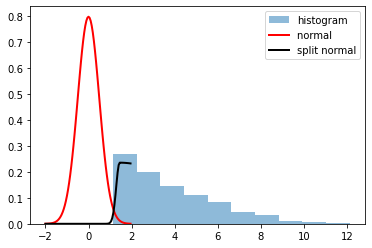

In [60]:
import math
def mle1(x):
    mu, sigma, tau = x
    return -np.sum(np.log(pdf(data, mu, np.abs(sigma),np.abs(tau))))

x0 = np.asarray((1, 1, 1))  # Initial guess.
res2 = optimize.fmin_cg(mle1, x0)
print(res2)
mu1,sigma1,tau1=res2
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density = True,histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'r-', lw=2, label='normal ')
ax.plot(t, pdf(t,mu1, sigma1,tau1), 'k-', lw=2, label='split normal')
ax.legend()
plt.show()

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [62]:
x0 = np.asarray((1, 1, 1))  # Initial guess.
res = optimize.fmin_cg(mle1, x0)
print("\n\nResult:", res)

         Current function value: 984.728630
         Iterations: 82
         Function evaluations: 880
         Gradient evaluations: 217


Result: [ 1.44347907  0.15735162 20.53296859]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [27]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [28]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

         Current function value: 984.728630
         Iterations: 82
         Function evaluations: 880
         Gradient evaluations: 217
[ 1.44347907  0.15735162 20.53296859]


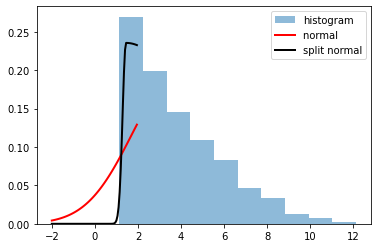

In [29]:
import math
def mle1(x):
    mu,sigma, tau= x
    return -np.sum(np.log(pdf(data, mu, np.abs(sigma),np.abs(tau))))

x0 = np.asarray((1, 1,1))  # Initial guess.
res2 = optimize.fmin_cg(mle1, x0)
print(res2)
mu1,sigma1,tau1=res2
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density = True,histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'r-', lw=2, label='normal ')
ax.plot(t, pdf(t,mu1, sigma1,tau1), 'k-', lw=2, label='split normal')
ax.legend()
plt.show()